# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [60]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
etc_response_data = requests.get(eth_url)
etc_response_data 

<Response [200]>

In [6]:
# Compute current value of my BTC cyrpto
## Display BTC response data
btc_response_data = requests.get(btc_url).json()
btc_response_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18945306,
   'total_supply': 18945306,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 38521.0,
     'volume_24h': 18005706108,
     'market_cap': 731097610438,
     'percentage_change_1h': 0.104599503365336,
     'percentage_change_24h': 1.70680333038215,
     'percentage_change_7d': 6.10096202725591,
     'percent_change_1h': 0.104599503365336,
     'percent_change_24h': 1.70680333038215,
     'percent_change_7d': 6.10096202725591},
    'CAD': {'price': 48952.4868,
     'volume_24h': 22881651322.0464,
     'market_cap': 929078843344.61,
     'percent_change_1h': 0.104599503365336,
     'percent_change_24h': 1.70680333038215,
     'percent_change_7d': 6.10096202725591}},
   'last_updated': 1643669694}},
 'metadata': {'timestamp': 1643669694,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [7]:
# Compute current value of my BTC cyrpto
## Display BTC response data
eth_response_data = requests.get(eth_url).json()
eth_response_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 119392589,
   'total_supply': 119392589,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2689.77,
     'volume_24h': 14222781216,
     'market_cap': 321472750200,
     'percentage_change_1h': 0.286640959142206,
     'percentage_change_24h': 4.43298910631131,
     'percentage_change_7d': 5.98684147652629,
     'percent_change_1h': 0.286640959142206,
     'percent_change_24h': 4.43298910631131,
     'percent_change_7d': 5.98684147652629},
    'CAD': {'price': 3418.159716,
     'volume_24h': 18074310369.2928,
     'market_cap': 408527570954.16,
     'percent_change_1h': 0.286640959142206,
     'percent_change_24h': 4.43298910631131,
     'percent_change_7d': 5.98684147652629}},
   'last_updated': 1643669639}},
 'metadata': {'timestamp': 1643669639,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [27]:
# Extracting my BTC value from btc_response_data
btc_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_value)

48952.4868


In [28]:
# Extracting my ETH value from eth_response_data
eth_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_value)

3418.159716


In [32]:
# Calculating my btc and eth value
## Printing current crypto wallet balance
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58742.98
The current value of your 5.3 ETH is $18116.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [33]:
# Set current amount of shares and bonds
my_agg = 200
my_spy = 50

In [34]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Confirm the keys
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [35]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [36]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-01-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [37]:
# Get current closing prices for SPY and AGG
## (use a limit=1000 parameter to call the most recent 1000 days of data)

my_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Preview DataFrame
my_portfolio.head()

AGG                                         SPY  \
                             open    high       low   close   volume     open   
time                                                                            
2021-02-01 00:00:00-05:00  117.20  117.26  117.0915  117.21  5469814  373.720   
2021-02-02 00:00:00-05:00  116.99  117.09  116.9700  117.05  4694446  379.650   
2021-02-03 00:00:00-05:00  116.97  116.99  116.8700  116.89  5060310  382.435   
2021-02-04 00:00:00-05:00  116.75  116.89  116.6900  116.86  5128808  382.960   
2021-02-05 00:00:00-05:00  116.91  116.96  116.7000  116.72  3230833  388.200   

                                                               
                             high       low   close    volume  
time                                                           
2021-02-01 00:00:00-05:00  377.34  370.3760  376.18  64056510  
2021-02-02 00:00:00-05:00  383.22  376.3181  381.54  53979346  
2021-02-03 00:00:00-05:00  383.70  380.4800  381.86  43305661  
2021-02-04 00:00:00-05:00  386.24  381.9655  386.17  40030930  
2021-02-05 00:00:00-05:00  388.47  386.1444  387.68  39312522

In [38]:
# Pick AGG close prices
agg_close = my_portfolio["AGG"].iloc[1]
agg_close_price = agg_close["close"]
agg_close_price

117.05

In [39]:
# Pick SPY close prices
spy_close = my_portfolio["SPY"].iloc[1]
spy_close_price = spy_close["close"]
spy_close_price

381.54

In [40]:
#Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.05
Current SPY closing price: $381.54


In [42]:
# Calculating my AGG and ETH value
## Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19077.00
The current value of your 200 AGG shares is $23410.00


### Savings Health Analysis

In [20]:
# Setting monthly household income
monthly_income = 12000

# Defining BTC and ETH total values
total_eth_value = my_eth * my_eth_value
total_btc_value = my_btc * my_btc_value

# Consolidate financial assets data
shares = my_agg_value + my_spy_value
crypto = total_btc_value + total_eth_value

# Printing as part of check of shares and crypto amounts
print(f"Shares amount = ${shares:0.2f}")
print(f"Crypto amount = ${crypto:0.2f}")

Shares amount = $42487.00
Crypto amount = $76859.23


In [21]:
# Creating savings DataFrame
## Indexing crypto and shares 
data = {"amount": [73831.01,42487.00]}
df = pd.DataFrame(data, index = ["crypto","shares"])
df_savings = pd.DataFrame(df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,73831.01
shares,42487.00


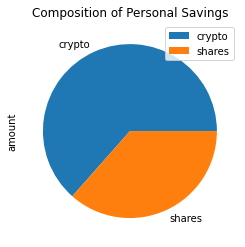

In [94]:
# Plot df_savings pie chart
save_plt = df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [44]:
# Set ideal emergency fund
## Print emergency fund amount
emergency_fund = monthly_income * 3
emergency_fund

36000

In [24]:
# Defining shares and crypto savings amount
## Calculate total amount of savings as total_savings
shares_save = df_savings["amount"].iloc[0]
crypto_save = df_savings["amount"].iloc[1]

total_savings = shares_save + crypto_save
total_savings

116318.01

In [46]:
# Find the difference between emergency_fund and total_savings for health check validation
difference = total_savings - emergency_fund
difference

80318.01

In [49]:
# Validate saving health
## Utilising if statement to conduct saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif (total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print("You are $" + {difference} +"away from your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [50]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [51]:
# Get 5 years' worth of historical data for SPY and AGG
## (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [61]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
## Weights are assigned 60% stocks = SPY and 40% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)

In [62]:
# Printing the mc_even_dist simulation input data
mc_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [54]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000890,0.999130,0.996585,0.992776,1.005008,1.009482,0.993178,1.005175,0.993546,0.999932,...,1.002952,1.013408,0.993026,0.986904,0.991922,0.981194,0.996036,1.008658,0.997716,1.000446
2,0.999425,0.986486,0.993166,0.989955,1.004223,1.007866,1.000766,0.988252,0.990145,1.000725,...,0.998098,1.005222,0.984973,0.983612,0.997193,0.988193,0.984651,0.992183,1.010634,1.002497
3,1.017265,0.980254,0.989551,0.997042,1.000921,0.999201,1.018798,0.994727,0.994501,1.006507,...,1.018081,1.013566,0.970119,0.986105,1.007822,0.992451,1.001970,0.993189,1.003968,1.003124
4,1.004154,0.985306,0.995480,0.998955,0.996415,0.995134,1.020955,1.002769,0.999984,0.993719,...,1.011700,1.031197,0.969246,0.985856,1.003348,0.992885,0.994901,1.004801,1.010013,1.004848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.102938,23.070224,14.756821,4.087981,14.369384,20.396601,58.003989,6.646794,17.757733,8.211914,...,6.637269,17.710586,16.478055,6.027669,20.400443,9.783648,42.308440,6.499290,12.241560,17.342708
7557,7.066873,23.040581,14.706863,4.101231,14.337487,20.539197,58.332475,6.642222,17.751716,8.168803,...,6.662207,17.981205,16.633642,6.082347,20.153943,9.888199,41.797570,6.491441,12.265221,17.537313
7558,7.100312,23.216321,14.889172,4.112374,14.288049,20.843972,57.909449,6.705778,17.849443,8.103276,...,6.703148,17.720232,16.627409,6.051872,20.228873,10.024492,42.115336,6.497179,12.288972,17.488654
7559,7.114488,23.597132,14.868301,4.083798,14.427026,20.883807,57.439394,6.720932,17.817671,8.051726,...,6.689277,17.507892,16.559274,6.148950,20.133060,9.960872,42.453285,6.495566,12.171190,17.313601


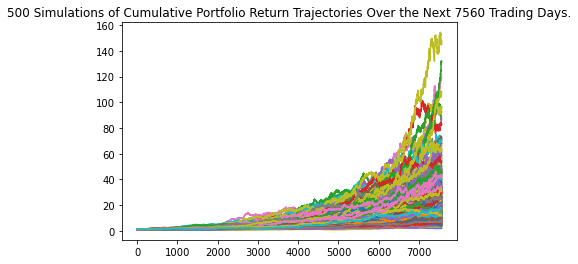

In [55]:
# Plot simulation outcomes for mc_even_dist
mc_even_line_plot = mc_even_dist.plot_simulation()

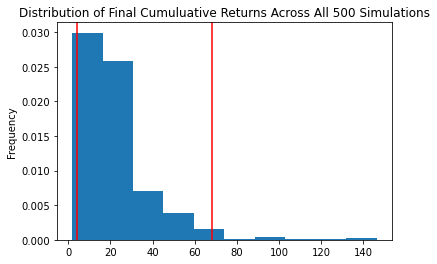

In [56]:
# Plot probability distribution and confidence intervals fro mc_even_dist
mc_even_dist_plot = mc_even_dist.plot_distribution()

### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_even_tbl = mc_even_dist.summarize_cumulative_return()

# Print summary statistics
print(mc_even_tbl)

count           500.000000
mean             22.338852
std              17.891522
min               1.855898
25%              10.555822
50%              17.949469
75%              26.557826
max             146.309115
95% CI Lower      4.246703
95% CI Upper     68.200167
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(mc_even_tbl[8]*20000,2)
even_ci_upper = round(mc_even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84934.07 and $1364003.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
## This 50% increase investment plan is called incr_initial_investment
incr_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
incr_ci_lower = round(mc_even_tbl[8]*incr_initial_investment,2)
incr_ci_upper = round(mc_even_tbl[9]*incr_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${incr_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${incr_ci_lower} and ${incr_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127401.1 and $2046005.02


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
## Weights are assigned 80% stocks = SPY and 20% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,59
    num_trading_days = 252*5)

In [64]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_even_dist_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004471,1.003885,1.021321,0.987801,1.002264,1.010268,1.010464,0.992042,1.007699,1.010566,...,0.998929,0.995683,0.990211,0.986911,0.986574,1.023175,0.984069,1.012842,0.983744,0.995760
2,1.013256,1.014367,1.028227,0.996263,1.003854,1.013828,1.004415,0.980004,1.017969,0.991182,...,0.998539,0.998769,0.982018,0.975577,0.998147,1.025619,0.991973,0.994097,0.989196,1.010667
3,1.009367,1.007579,1.020019,0.988525,1.013325,1.017703,0.987684,0.970230,0.999402,1.011618,...,1.002990,1.011793,0.997976,0.967544,0.991626,0.999891,0.990310,1.001275,0.981713,0.998353
4,1.003071,1.004151,1.032586,0.981489,1.012556,1.027375,0.969085,0.976253,1.011711,1.026138,...,1.003178,0.991614,1.010908,0.978590,1.001346,0.990737,0.950630,1.008228,1.003285,1.008773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.942799,3.724359,3.586222,2.203689,2.324661,0.899500,3.547871,1.006299,2.239523,1.300981,...,1.547772,1.652291,2.826581,0.807438,1.060539,2.480106,1.363173,1.442054,1.679575,1.150244
1257,0.946472,3.694262,3.585855,2.203392,2.290525,0.894353,3.573077,0.986615,2.231469,1.277448,...,1.550005,1.648886,2.818538,0.809716,1.057551,2.501143,1.367929,1.436266,1.699065,1.176338
1258,0.948895,3.701048,3.559718,2.199598,2.306662,0.894806,3.529216,0.998232,2.218274,1.275497,...,1.547229,1.646208,2.806801,0.819700,1.044734,2.511007,1.387385,1.431667,1.686807,1.175403
1259,0.960988,3.739618,3.510143,2.169610,2.225043,0.894687,3.599438,1.011370,2.182143,1.295838,...,1.559119,1.657586,2.817025,0.822837,1.043543,2.542437,1.399097,1.446480,1.706666,1.181554


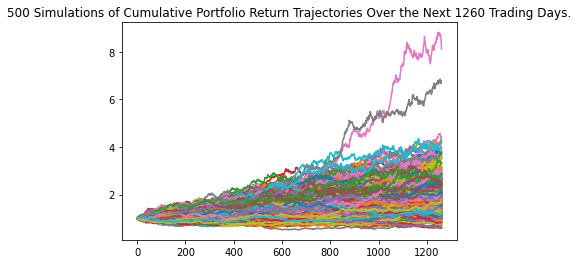

In [65]:
# Plot simulation outcomes for 5 year returns
even_five_year_plot = mc_even_dist_five_years.plot_simulation()

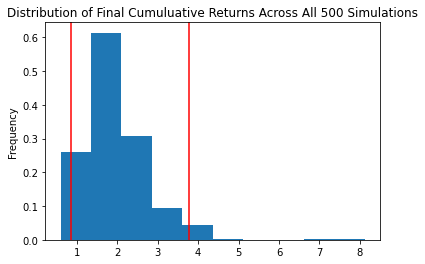

In [66]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = mc_even_dist_five_years.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summ = mc_even_dist_five_years.summarize_cumulative_return()

# Print summary statistics
print(five_year_summ)

count           500.000000
mean              1.942035
std               0.792974
min               0.592850
25%               1.415632
50%               1.802459
75%               2.354912
max               8.122888
95% CI Lower      0.845524
95% CI Upper      3.768633
Name: 1260, dtype: float64


In [77]:
# Setting initial investment for 5 year investment
five_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_summ[8]*five_initial_investment,2)
ci_upper_five = round(five_year_summ[9]*five_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16910.48 and $75372.66


### Ten Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
## Weights are assigned 80% stocks = SPY and 20% bonds = AGG
### Weights = AGG,SPY ratio
mc_even_dist_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10)

In [71]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_even_dist_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ddout\Desktop\FinTech\Unit 5 Homework - Financial Planning\Unit-5-Financial-Planning-Dottie-Doutre\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988909,1.012412,1.005217,1.008748,1.003025,1.008260,1.002402,1.001589,1.005483,0.989041,...,0.989265,1.012086,1.027694,1.009619,0.997983,0.983199,0.995403,0.979470,1.004967,1.004243
2,0.998907,1.004271,0.995356,1.001802,1.019259,1.006928,0.996113,0.999241,1.006050,0.978371,...,0.987074,1.027727,1.024325,0.992376,1.004820,1.009392,1.000524,0.979760,0.994577,1.001996
3,0.998242,1.008427,0.985011,1.004214,1.017819,1.005617,0.997568,1.000192,0.996244,0.972692,...,0.971944,1.022857,1.031699,1.018827,1.010433,1.011392,0.996015,0.977063,0.999002,1.007992
4,0.997070,1.030452,0.983807,1.011466,1.031135,1.009658,0.991631,0.990484,1.006519,0.991732,...,0.958327,1.021856,1.033913,1.006234,1.023134,1.014111,0.977292,0.979773,0.997485,1.006638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.166155,1.576728,6.044996,0.884763,3.055231,6.514142,1.316548,4.412750,2.549478,3.497136,...,4.508901,2.755871,4.066069,3.584360,3.740381,3.792015,3.125973,3.982170,2.226631,3.059244
2517,7.120032,1.573116,5.938953,0.894926,3.099453,6.629521,1.321033,4.463570,2.534733,3.531661,...,4.491120,2.752316,4.075528,3.523141,3.660836,3.827210,3.143178,3.966212,2.239875,3.024646
2518,7.236033,1.551657,5.852024,0.893758,3.068812,6.609189,1.333161,4.490343,2.564729,3.552513,...,4.552381,2.775665,4.161844,3.561257,3.632082,3.826208,3.144356,3.997987,2.253478,3.035251
2519,7.070265,1.538421,5.859513,0.906978,3.066677,6.606468,1.333533,4.470755,2.563692,3.546100,...,4.495865,2.768900,4.212287,3.506133,3.673486,3.816593,3.169164,3.933192,2.202705,3.088539


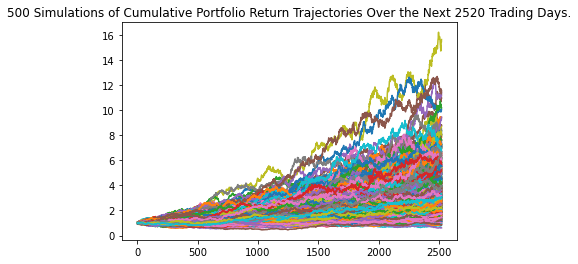

In [72]:
# Plot simulation outcomes for 10 year investment
even_ten_year_plot = mc_even_dist_ten_years.plot_simulation()

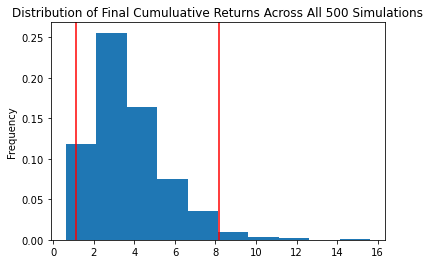

In [73]:
# Plot probability distribution and confidence intervals
ten_year_dist_plot = mc_even_dist_ten_years.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summ = mc_even_dist_ten_years.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summ)

count           500.000000
mean              3.734864
std               1.919989
min               0.612875
25%               2.438436
50%               3.435591
75%               4.567737
max              15.634604
95% CI Lower      1.125433
95% CI Upper      8.190271
Name: 2520, dtype: float64


In [78]:
# Set initial investment
ten_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_summ[8]*ten_initial_investment,2)
ci_upper_ten = round(ten_year_summ[9]*ten_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22508.66 and $163805.42
